<a href="https://colab.research.google.com/github/eduard0cortes/Desaf-o-Data-Science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [11]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación
ingreso total por cada tienda


In [26]:
#Calculo del ingreso total para cada tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

#formateado los ingresos con separador de miles y símbolo de pesos
ingreso_tienda1_formateado = "{:,.0f}".format(ingreso_tienda1)
ingreso_tienda2_formateado = "{:,.0f}".format(ingreso_tienda2)
ingreso_tienda3_formateado = "{:,.0f}".format(ingreso_tienda3)
ingreso_tienda4_formateado = "{:,.0f}".format(ingreso_tienda4)

#imprimir los resultados
print("Ingreso total tienda 1: $", ingreso_tienda1_formateado)
print("Ingreso total tienda 2: $", ingreso_tienda2_formateado)
print("Ingreso total tienda 3: $", ingreso_tienda3_formateado)
print("Ingreso total tienda 4: $", ingreso_tienda4_formateado)



Ingreso total tienda 1: $ 1,150,880,400
Ingreso total tienda 2: $ 1,116,343,500
Ingreso total tienda 3: $ 1,098,019,600
Ingreso total tienda 4: $ 1,038,375,700


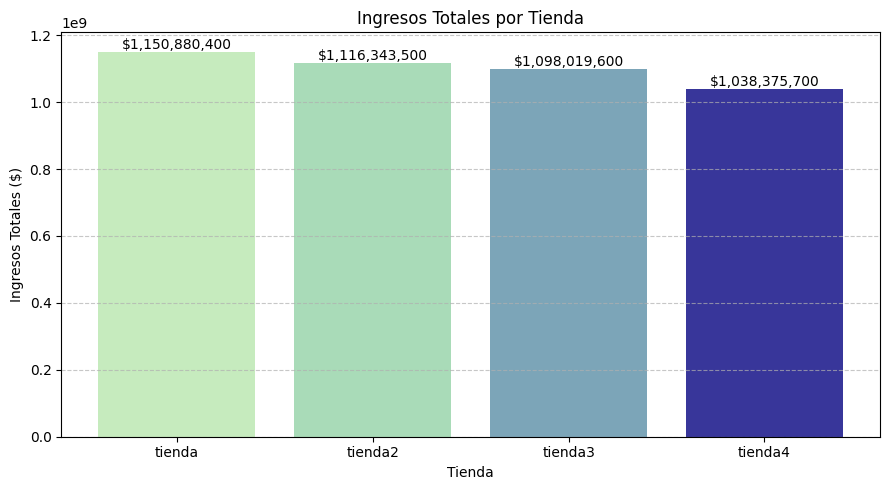

In [34]:
tiendas = ['tienda', 'tienda2', 'tienda3', 'tienda4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
colores = ['#C6EBBE', '#A9DBB8', '#7CA5B8', '#38369A']

plt.figure(figsize=(9, 5))
barras = plt.bar(tiendas, ingresos, color=colores)
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas sobre las barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f"${yval:,.0f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

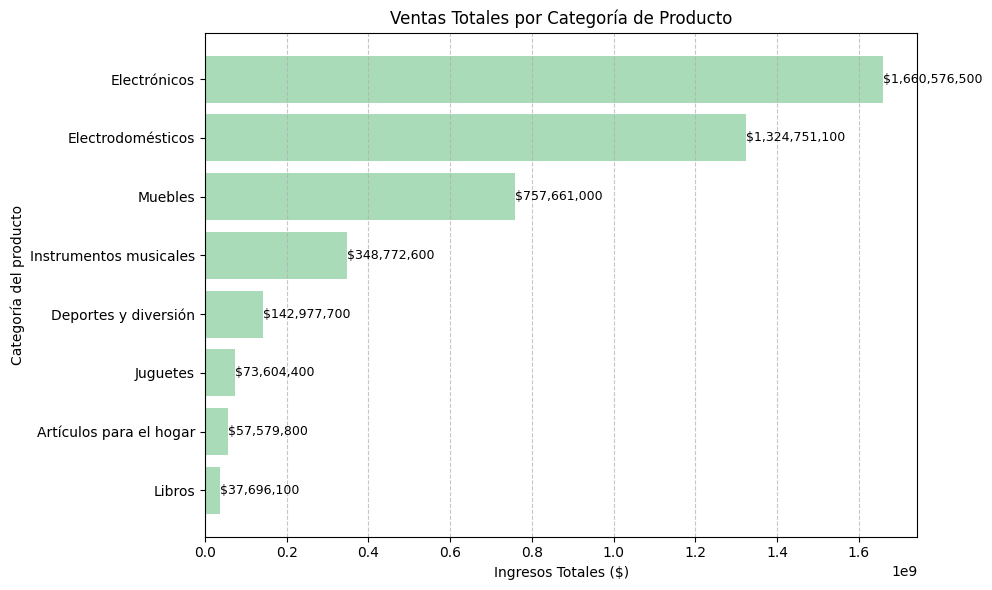

In [40]:
#Unir los datos de todas las tiendas en un solo DataFrame
datos_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
#Agrupar los datos por categoría y sumar los precios
ventas_por_categoria = datos_tiendas.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

#Visualizacion
plt.figure(figsize=(10, 6))
barras = plt.barh(ventas_por_categoria.index, ventas_por_categoria.values, color='#A9DBB8')
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Ingresos Totales ($)')
plt.ylabel('Categoría del producto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Para que la categoría con más ventas quede arriba

#Etiquetas sobre las barras
for barra in barras:
    xval = barra.get_width()
    plt.text(xval + 10000, barra.get_y() + barra.get_height()/2, f"${xval:,.0f}", va='center', fontsize=9)
plt.tight_layout()
plt.show()


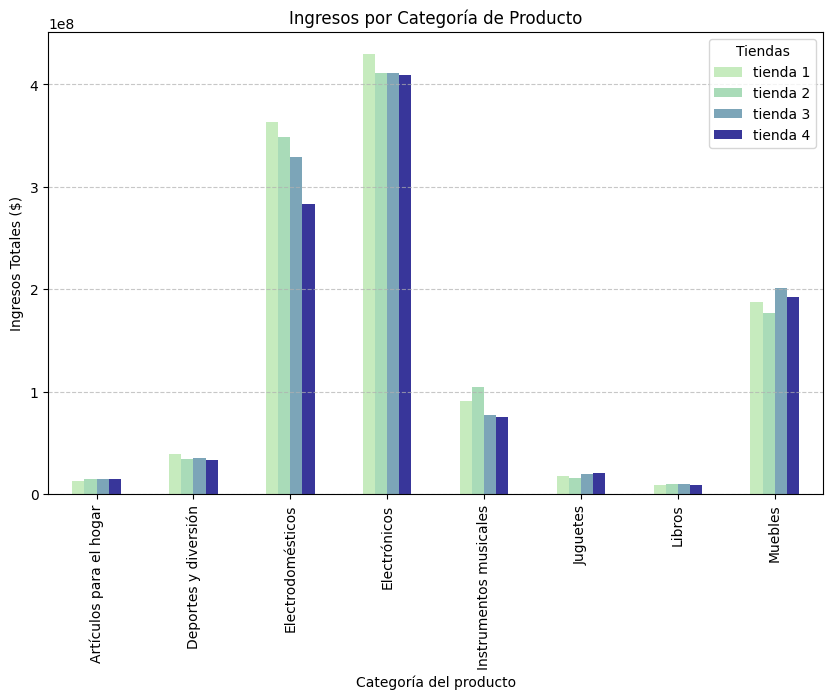

In [44]:
#Crear un DataFrame con los ingresos por categoría para cada tienda
categorias_tienda1 = tienda.groupby('Categoría del Producto')['Precio'].sum()
categorias_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
categorias_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
categorias_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

#Unir en un solo DataFrame para hacer comparación
df_categorias = pd.DataFrame({
    "tienda 1": categorias_tienda1,
    "tienda 2": categorias_tienda2,
    "tienda 3": categorias_tienda3,
    "tienda 4": categorias_tienda4
})

#Visualizacion
df_categorias.plot(kind='bar', figsize=(10, 6), color=['#C6EBBE', '#A9DBB8', '#7CA5B8', '#38369A'])
plt.title('Ingresos por Categoría de Producto')
plt.xlabel('Categoría del producto')
plt.ylabel('Ingresos Totales ($)')
plt.legend(title='Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.7)

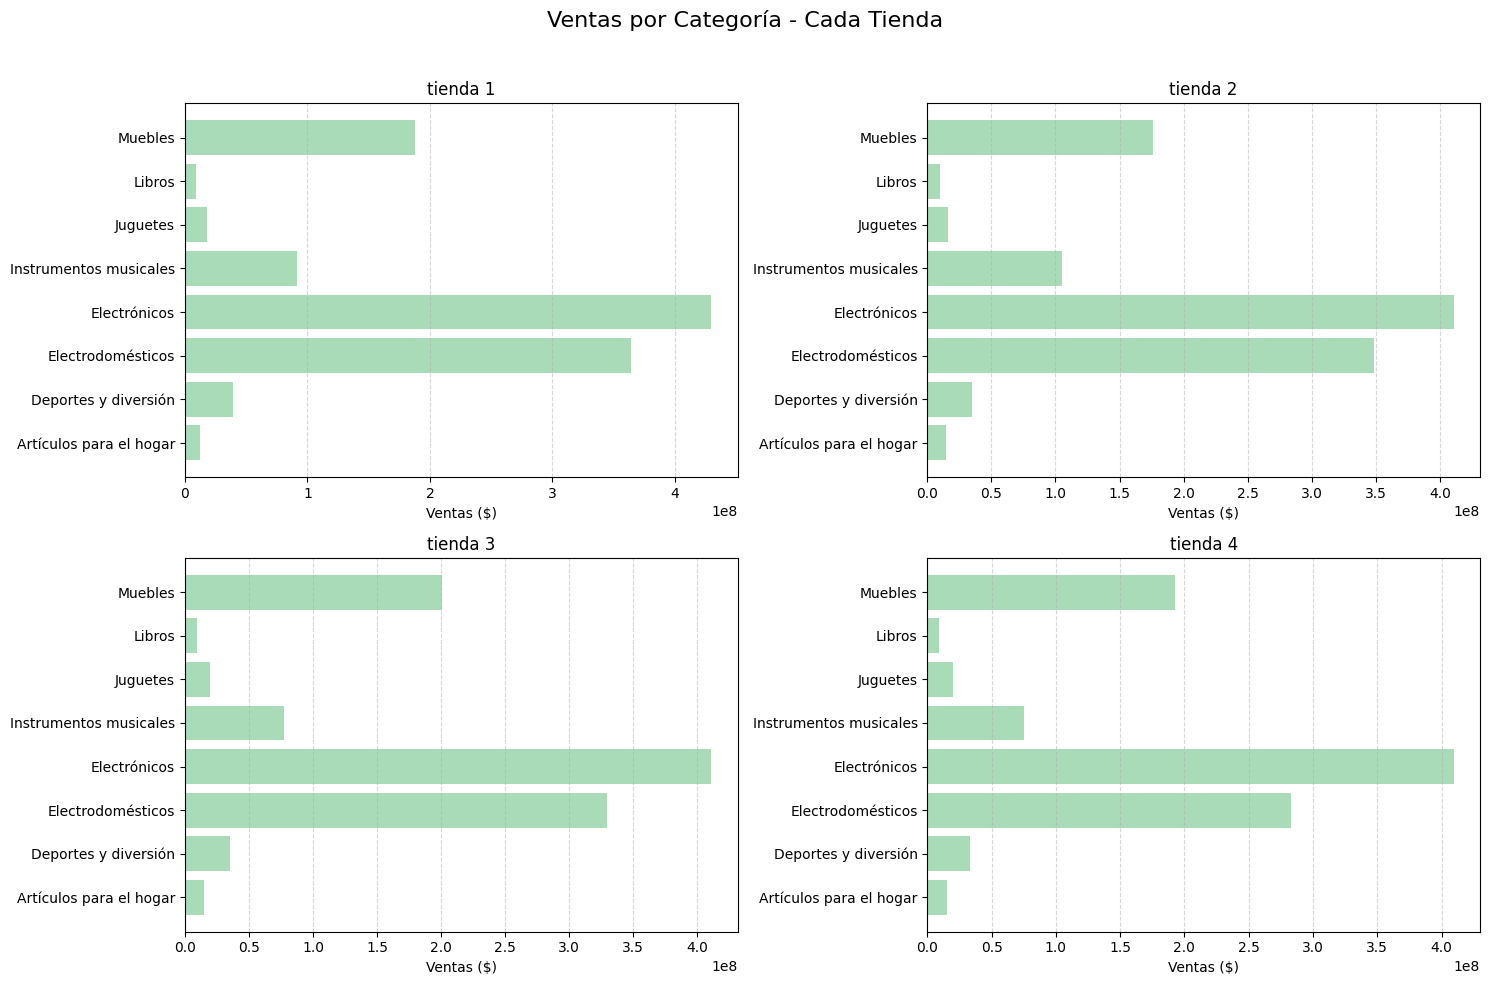

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
tiendas_data = [tienda, tienda2, tienda3, tienda4]
tiendas_nombres = ['tienda 1', 'tienda 2', 'tienda 3', 'tienda 4']
for i, ax in enumerate(axes.flatten()):
    categoria = tiendas_data[i].groupby('Categoría del Producto')['Precio'].sum()
    ax.barh(categoria.index, categoria.values, color='#A9DBB8')
    ax.set_title(tiendas_nombres[i])
    ax.set_xlabel('Ventas ($)')
    ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.suptitle('Ventas por Categoría - Cada Tienda', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda